In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
from collections import Counter
import glob
import os
import pickle
import re
import time

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.models.ldamulticore import LdaMulticore
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

NOTEBOOKS_DIR = os.path.abspath(os.getcwd())
ROOT_DIR = os.path.split(NOTEBOOKS_DIR)[0]
PROCESSED_DATA_DIR = os.path.join(ROOT_DIR, 'data', 'processed')

FINAL_DF_FILEPATH = os.path.join(PROCESSED_DATA_DIR, 'final.csv')
ML_ONLY_FILEPATH = os.path.join(PROCESSED_DATA_DIR, 'machine_learning_only.csv')

In [3]:
df = pd.read_csv(FINAL_DF_FILEPATH, encoding='utf-8')

In [5]:
df_ml = pd.read_csv(ML_ONLY_FILEPATH, encoding='utf-8')

In [7]:
def print_influential_words_per_topic(H, vocabulary):
    '''
    Print the most influential words of each latent topic.
    '''
    hand_labels = []
    for i, row in enumerate(H):
        top_ten = np.argsort(row)[::-1][:10]
        print('topic', i)
        print('-->', ' '.join(vocabulary[top_ten]))
        print(H[i, top_ten])
        print()

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_ml = tfidf_vectorizer.fit_transform(df_ml['description'])
features = np.array(tfidf_vectorizer.get_feature_names())
nmf_model = NMF(n_components=10, random_state=42)
W = nmf_model.fit_transform(tfidf_ml)
H = nmf_model.components_
print_influential_words_per_topic(H, features)

topic 0
--> data learning machine time real analysis methods series classification sets
[3.42728368 0.91277008 0.83532128 0.76814321 0.57162787 0.56180456
 0.55081958 0.54949722 0.48263448 0.47657914]

topic 1
--> optimization gradient convex matrix convergence stochastic problems method rank descent
[1.0687652  1.02994206 0.97256241 0.8057191  0.80124985 0.73425117
 0.6541769  0.6343447  0.59084966 0.57058573]

topic 2
--> neural networks network deep training layer convolutional layers architecture architectures
[1.8918856  1.83349385 1.81388113 1.2940825  0.72098239 0.60196585
 0.56018151 0.47429603 0.45948335 0.43142566]

topic 3
--> learning policy reinforcement agent rl agents control policies tasks reward
[1.64126279 1.21072374 0.98319234 0.75104212 0.61998511 0.50565936
 0.49893129 0.49017762 0.4519282  0.44605572]

topic 4
--> model models inference latent bayesian variational variables distribution gaussian posterior
[1.64899387 1.40214615 1.0670907  0.90237447 0.82564889 0.7

In [12]:
df_ml['first_date'] = df_ml['dates'].str.split(',').str[0]
df_ml['year'] = df_ml['first_date'].map(lambda x: x.split('-')[0])
years = df_ml['year']
years = years.reset_index(drop=True)

In [13]:
W_series = pd.Series(W[:, 0])
W_series.name = 'topic_loadings'
W_series = W_series.reset_index(drop=True)

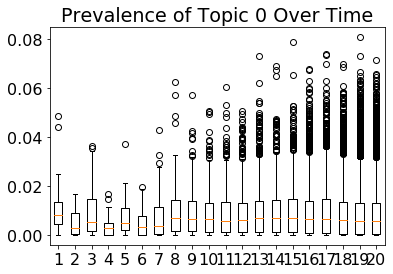

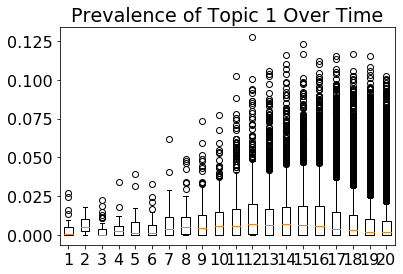

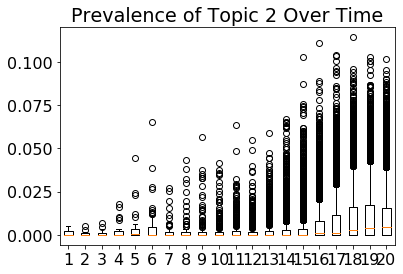

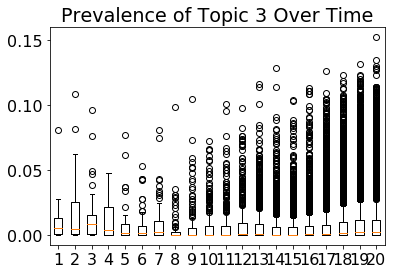

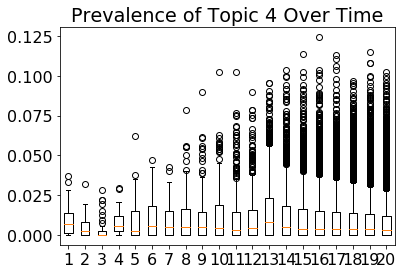

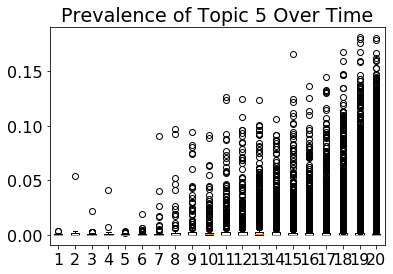

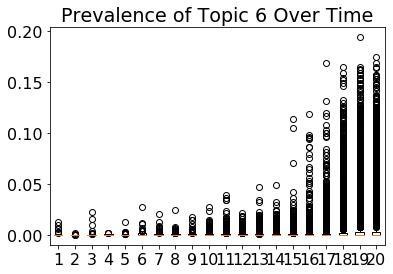

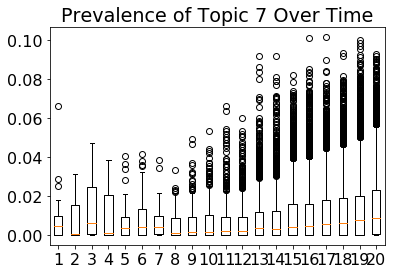

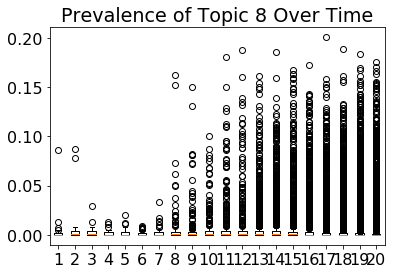

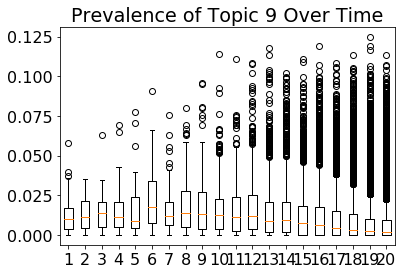

In [25]:
for topic_idx in range(10):
    W_series = pd.Series(W[:, topic_idx])
    W_series.name = 'topic_loadings'
    W_series = W_series.reset_index(drop=True)

    vals = []
    for year in range(2000, 2020):
        year = str(year)
        vals.append(W_series[years == year])

    _ = plt.boxplot(vals)
    _ = plt.title(f'Prevalence of Topic {topic_idx} Over Time')
    plt.show()

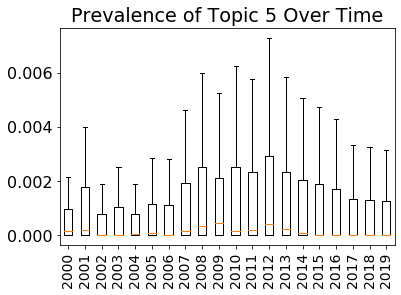

In [35]:
topic_idx = 5
W_series = pd.Series(W[:, topic_idx])
W_series.name = 'topic_loadings'
W_series = W_series.reset_index(drop=True)

vals = []
for year in range(2000, 2020):
    year = str(year)
    vals.append(W_series[years == year])

_ = plt.boxplot(vals, sym='', labels=range(2000, 2020))
_ = plt.xticks(rotation=90, fontsize=14)
_ = plt.title(f'Prevalence of Topic {topic_idx} Over Time')
plt.show()

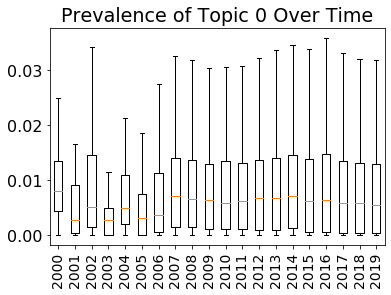

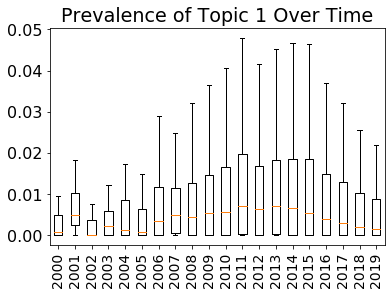

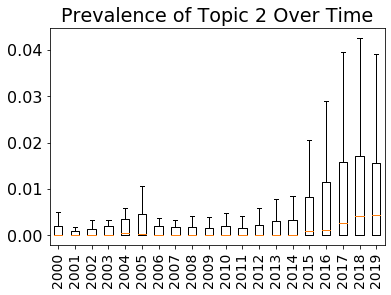

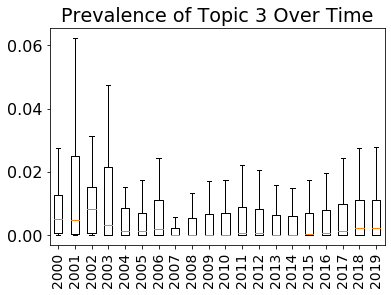

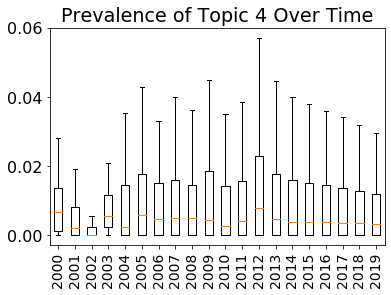

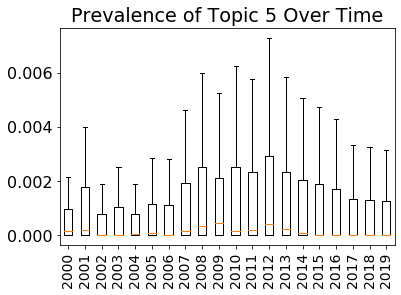

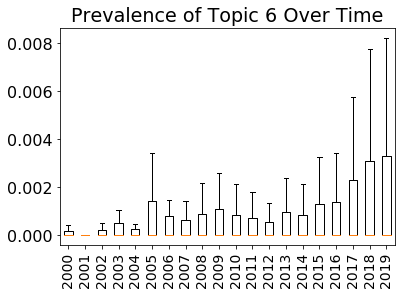

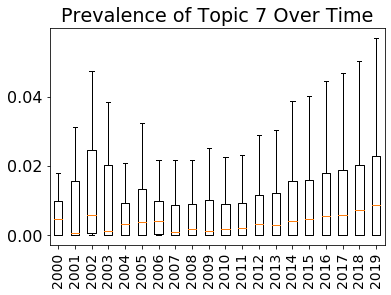

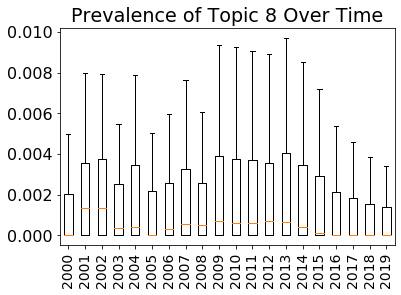

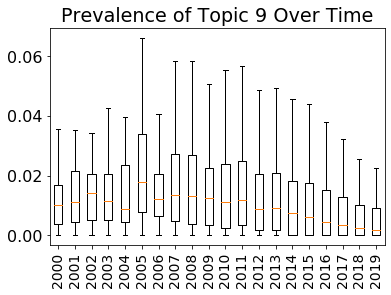

In [36]:
for topic_idx in range(10):
    W_series = pd.Series(W[:, topic_idx])
    W_series.name = 'topic_loadings'
    W_series = W_series.reset_index(drop=True)

    vals = []
    for year in range(2000, 2020):
        year = str(year)
        vals.append(W_series[years == year])

    _ = plt.boxplot(vals, sym='', labels=range(2000, 2020))
    _ = plt.xticks(rotation=90, fontsize=14)
    _ = plt.title(f'Prevalence of Topic {topic_idx} Over Time')
    plt.show()

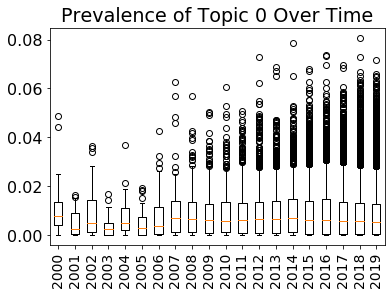

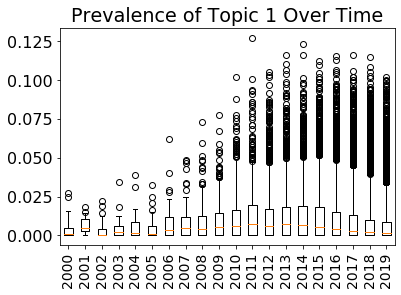

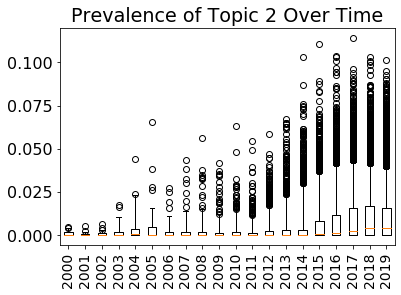

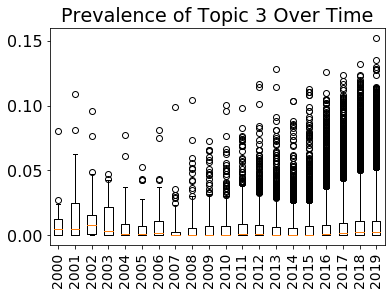

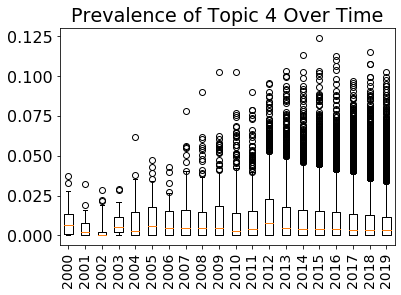

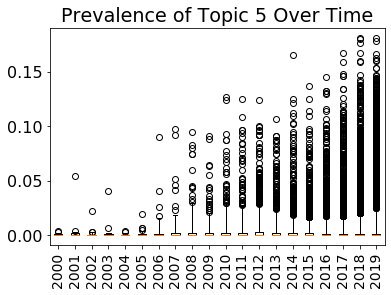

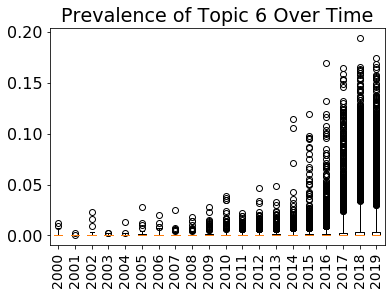

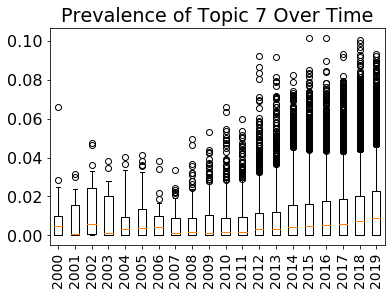

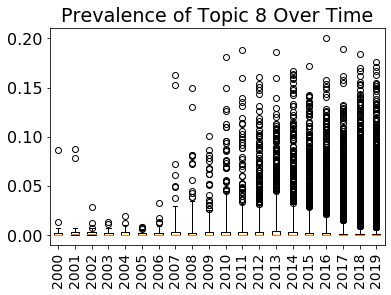

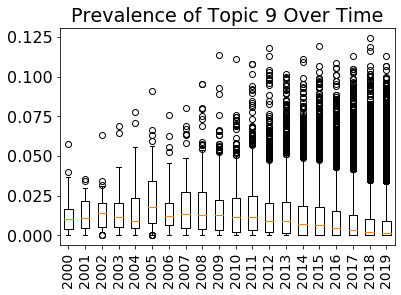

In [37]:
for topic_idx in range(10):
    W_series = pd.Series(W[:, topic_idx])
    W_series.name = 'topic_loadings'
    W_series = W_series.reset_index(drop=True)

    vals = []
    for year in range(2000, 2020):
        year = str(year)
        vals.append(W_series[years == year])

    _ = plt.boxplot(vals, whis=[5, 95], labels=range(2000, 2020))
    _ = plt.xticks(rotation=90, fontsize=14)
    _ = plt.title(f'Prevalence of Topic {topic_idx} Over Time')
    plt.show()

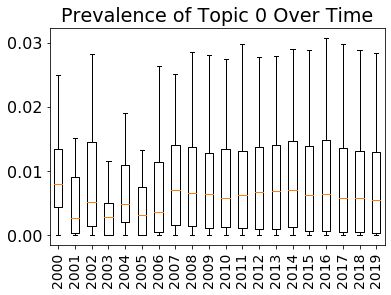

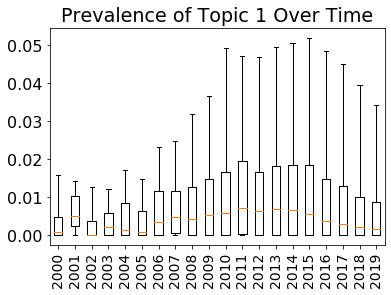

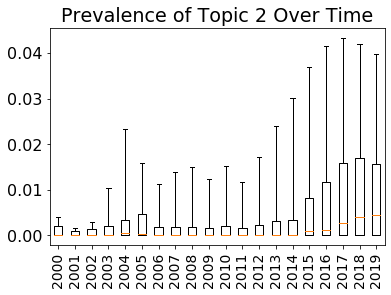

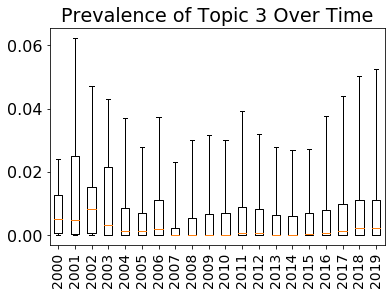

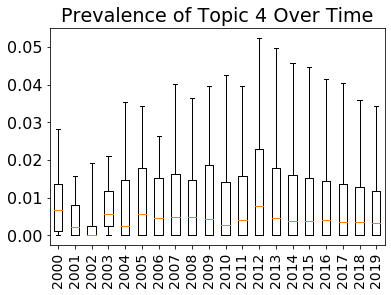

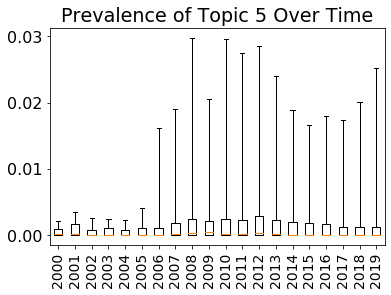

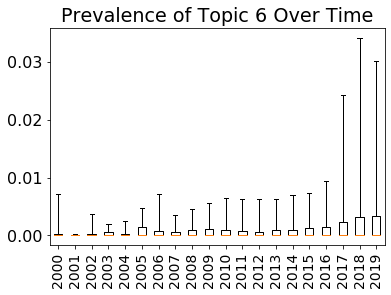

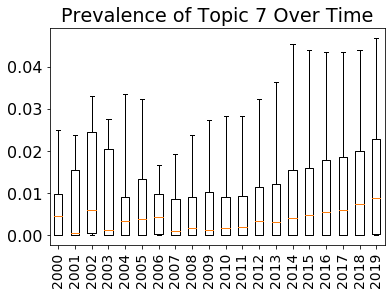

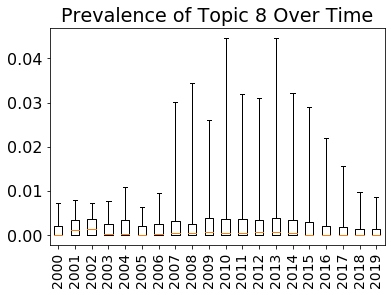

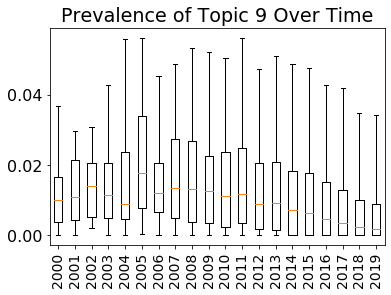

In [38]:
for topic_idx in range(10):
    W_series = pd.Series(W[:, topic_idx])
    W_series.name = 'topic_loadings'
    W_series = W_series.reset_index(drop=True)

    vals = []
    for year in range(2000, 2020):
        year = str(year)
        vals.append(W_series[years == year])

    _ = plt.boxplot(vals, whis=[5, 95], sym='', labels=range(2000, 2020))
    _ = plt.xticks(rotation=90, fontsize=14)
    _ = plt.title(f'Prevalence of Topic {topic_idx} Over Time')
    plt.show()

# What are the words indicative of the years?

# Testing n-gram run times

In [44]:
start = time.time()
ngram_tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
ngram_tfidf_ml = ngram_tfidf_vectorizer.fit_transform(df_ml['description'])
print(time.time() - start)

19.94872498512268


In [45]:
start = time.time()
ngram_tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
ngram_tfidf_ml = ngram_tfidf_vectorizer.fit_transform(df_ml['description'])
print('ngram_tfidf_ml:', time.time() - start)
features = np.array(ngram_tfidf_vectorizer.get_feature_names())
print('features:', time.time() - start)
nmf_model = NMF(n_components=10, random_state=42)
print('nfm_model:', time.time() - start)
W_ngram = nmf_model.fit_transform(ngram_tfidf_ml)
print('W_ngram:', time.time() - start)
H_ngram = nmf_model.components_
print('H_ngram:', time.time() - start)

features: 0.007580995559692383
nfm_model: 0.008081912994384766
W_ngram: 5.048890113830566
H_ngram: 5.04906702041626
